In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("heart_cleveland_upload.csv")
df = df1.copy()
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
#cek null data
nulls = pd.DataFrame(df1.isna().sum())
nulls['ratio'] = nulls / df1.shape[0]
nulls

,0,ratio
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [5]:
# Counting the element in each class
df["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


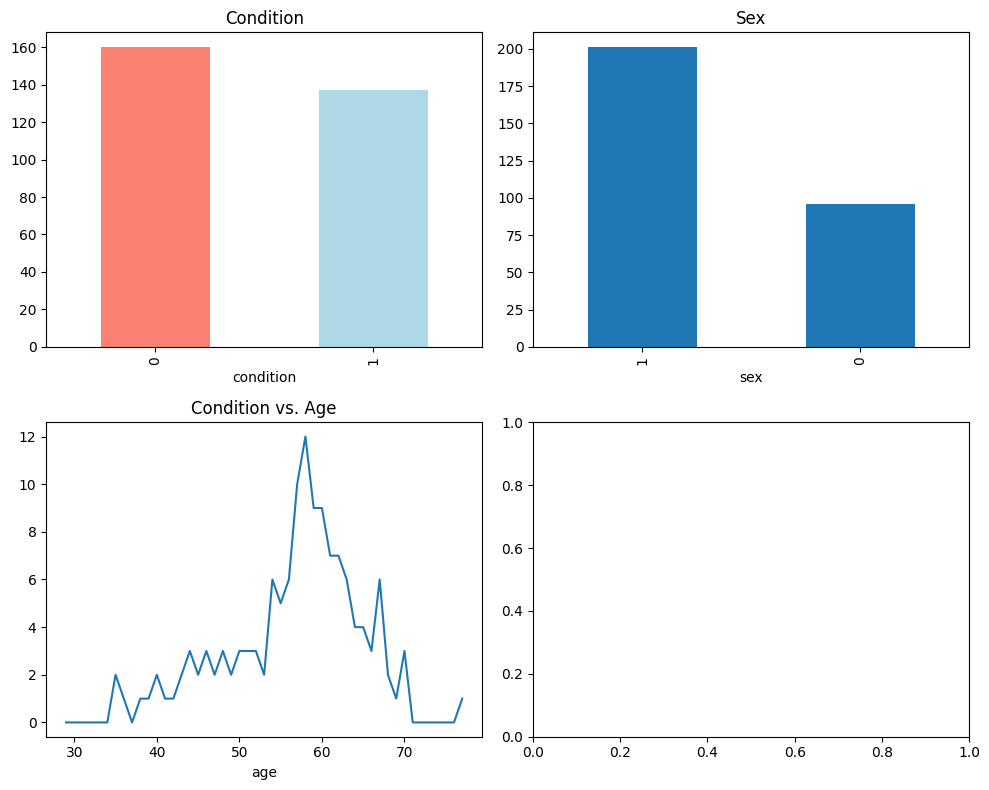

In [7]:
# Membuat subplots dengan grid 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Grafik 1: Bar Plot untuk kolom "condition"
df["condition"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], ax=axes[0, 0])
axes[0, 0].set_title("Condition")

# Grafik 2: Bar Plot untuk kolom "sex"
df["sex"].value_counts().plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("Sex")

# Grafik 3: Menambahkan grafik lainnya di (1, 0)
data = df1.groupby("age").sum()
data.condition.plot(kind = "line", ax=axes[1, 0])
axes[1, 0].set_title("Condition vs. Age")

# Grafik 4: Menambahkan grafik lainnya di (1, 1)
# df["column4"].plot(kind="...")
# axes[1, 1].set_title("Title 4")

# Mengatur tata letak antar grafik
plt.tight_layout()

# Menampilkan grafik
plt.show()





<Axes: >

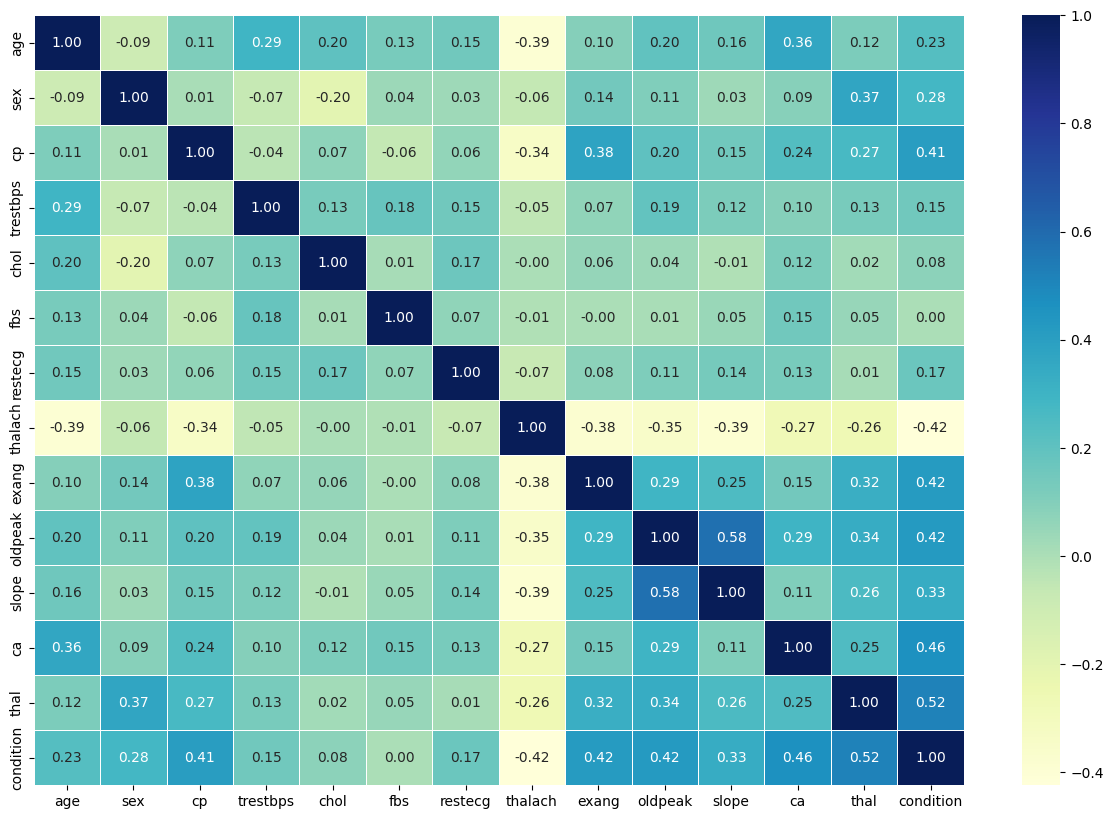

In [9]:
# Visualizing corraltion matrix with sns heatmap

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu")